In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import scorer
from matplotlib import style
style.use('dark_background')

### Data Load

In [2]:
iris = datasets.load_iris()

In [3]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
# df['target'] = df['target'].map({0:iris.target_names[0],1:iris.target_names[1],2:iris.target_names[2]})
df['target'] = np.array([iris.target_names[i] for i in iris.target])

### Data Visualization

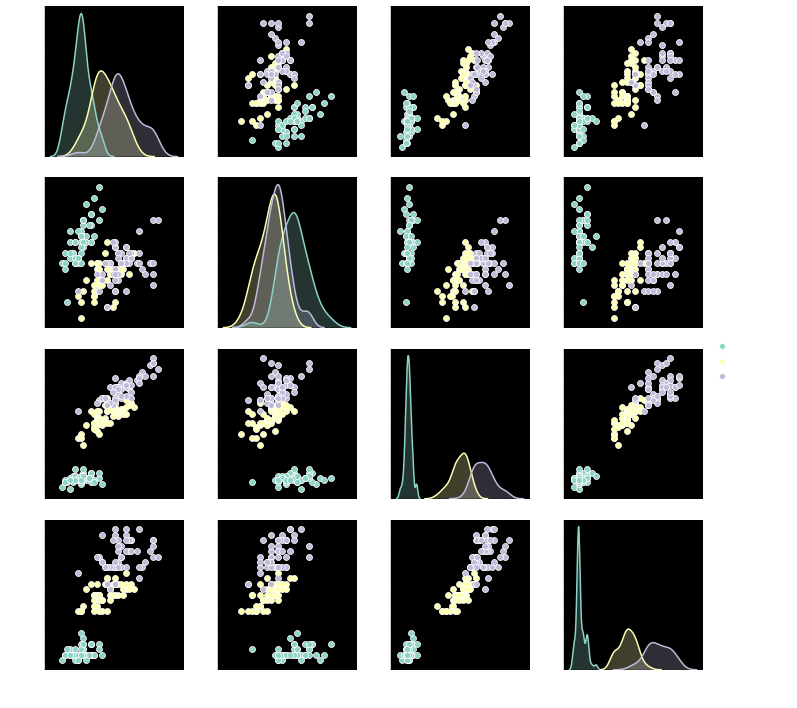

In [5]:
sns.pairplot(df, hue='target')

### Preprocessing

In [6]:
X = df.iloc[:,:-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, shuffle=True)

### generate the model

In [28]:
# Decision Tree
#끝까지 분할을 하고 그 다음에 pruning이 진행된다.
dt_clf = DecisionTreeClassifier(max_depth=4,random_state=0)

dt_clf.fit(X_train, y_train)
predicted = dt_clf.predict(X_test)

print('Test score:',accuracy_score(predicted, y_test))

Test score: 1.0


### Graphviz Visualize

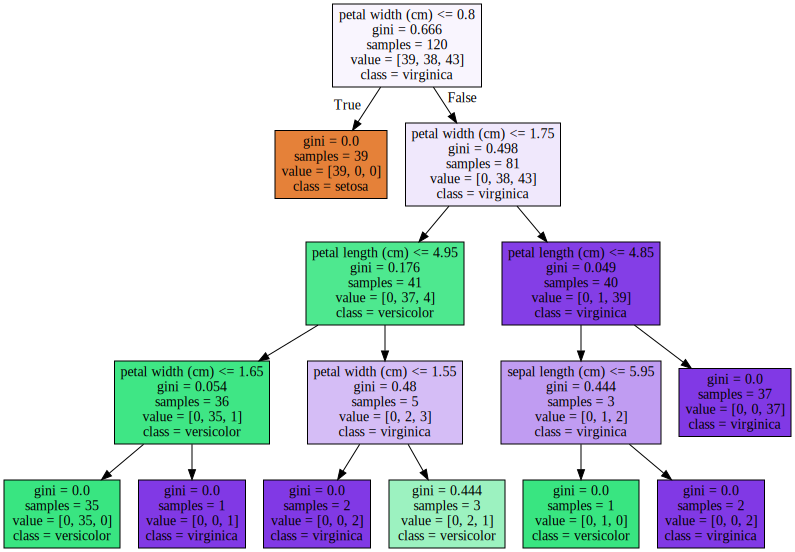

'iris_tree.png.pdf'

In [44]:
from sklearn.tree import export_graphviz
import graphviz
# impurity : 지니계수
# filled : 색채움

export_graphviz(dt_clf, out_file='tree.dot', class_names=iris.target_names,
               feature_names=iris.feature_names, impurity=True, filled=True)

# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open('tree.dot') as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
display(dot)
dot.render(filename='iris_tree.png')
